In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing Training Data

In [2]:
data=pd.read_csv('./train.csv')
data.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score,exam score
0,EXA000001,none,male,some college,standard,Section A,70,73,70
1,EXA000002,none,male,master's degree,free/reduced,Section C,55,54,52
2,EXA000003,none,male,master's degree,free/reduced,Section E,56,46,43
3,EXA000004,none,female,some college,free/reduced,Section C,35,47,41
4,EXA000005,none,female,high school,standard,Section C,87,92,81


In [3]:
#Shape of the Data
data.shape

(31999, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31999 entries, 0 to 31998
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Roll no                      31999 non-null  object
 1   test preparation             31999 non-null  object
 2   gender                       31999 non-null  object
 3   parental level of education  31999 non-null  object
 4   lunch                        31999 non-null  object
 5   Section                      31999 non-null  object
 6   practical score              31999 non-null  int64 
 7   viva score                   31999 non-null  int64 
 8   exam score                   31999 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.2+ MB


In [6]:
data.describe()

,practical score,viva score,exam score
count,31999.000000,31999.000000,31999.000000
mean,67.839870,70.375168,69.139598
std,15.229898,14.092764,15.009974
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.000000,70.000000
75%,80.000000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [5]:
#Checking Duplicate Values
data.duplicated().sum()
#Dataset doesn't contain any duplicate values

0

In [6]:
#Checking Null values
data.isnull().sum()

Roll no                        0
test preparation               0
gender                         0
parental level of education    0
lunch                          0
Section                        0
practical score                0
viva score                     0
exam score                     0
dtype: int64

Analysing Numerical Columns

In [7]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!='O']
numerical_features #there are 3 numerical features present in given dataset

['practical score', 'viva score', 'exam score']

In [8]:
data[numerical_features]

,practical score,viva score,exam score
0,70,73,70
1,55,54,52
2,56,46,43
3,35,47,41
4,87,92,81
...,...,...,...
31994,63,53,80
31995,100,80,68
31996,62,61,74
31997,75,32,82


Analysing "Practical Score" column

In [9]:
data['practical score'].describe()

count    31999.000000
mean        67.839870
std         15.229898
min         15.000000
25%         58.000000
50%         68.000000
75%         80.000000
max        100.000000
Name: practical score, dtype: float64

In [9]:
print("Minimum Practical Score :{}\nMean of Practical Score :{}\nMedian of Practical score :{}\nMaximum of Practical score :{}".format(data['practical score'].min(),data['practical score'].mean(),data['practical score'].median(),data['practical score'].max(),))

Minimum Practical Score :15
Mean of Practical Score :67.83986999593738
Median of Practical score :68.0
Maximum of Practical score :100


<Axes: xlabel='practical score', ylabel='Count'>

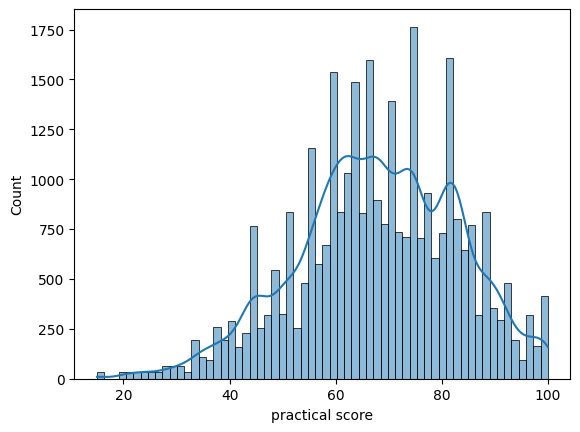

In [19]:
sns.histplot(data,x='practical score',kde=True)

 Here the mean score and median score are very close (67.839870 and 68.000000), it suggests that there is no significant skewness in the data 

Since the mean is very close to the median, this suggests that the data is likely symmetrically distributed or approximately normally distributed

Text(0.5, 1.0, 'Practical Score')

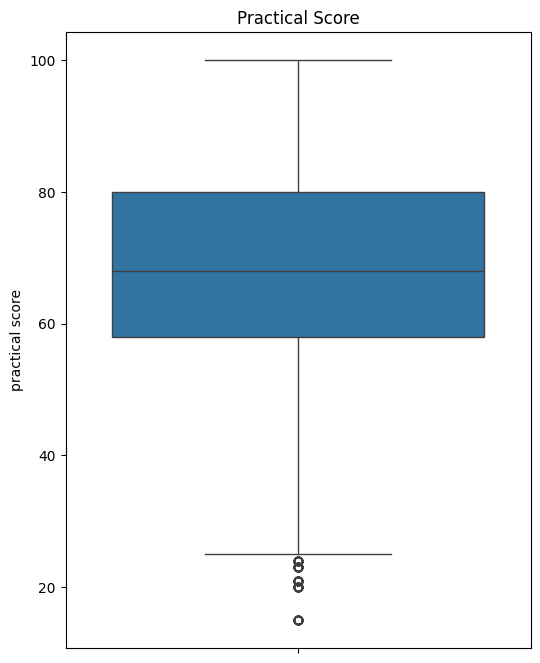

In [13]:
plt.figure(figsize=(6,8))
sns.boxplot(data['practical score'])
plt.title('Practical Score')

Box plot shows that given data contains some Outliers

In [25]:
#Calculating Lower and Upper Fence 

def calculate_lowupperfence(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    lower_fence=Q1-(1.5*IQR)
    higher_fence=Q3+(1.5*IQR)

    return lower_fence,higher_fence

In [26]:
lower_fence,upper_fence=calculate_lowupperfence(data['practical score'])
print("Lower Fence : {}\nUpper Fence : {}".format(lower_fence,upper_fence))

Lower Fence : 25.0
Upper Fence : 113.0


The practical scores below Lowerfence (25.0) & above Upperfence (113.0) are consider as Outliers

Analysing "viva score"

In [28]:
print("Minimum viva Score :{}\nMean of viva Score :{}\nMedian of viva score :{}\nMaximum of viva score :{}".format(data['viva score'].min(),data['viva score'].mean(),data['viva score'].median(),data['viva score'].max(),))

Minimum viva Score :25
Mean of viva Score :70.37516797399918
Median of viva score :70.0
Maximum of viva score :100


<Axes: xlabel='viva score', ylabel='Count'>

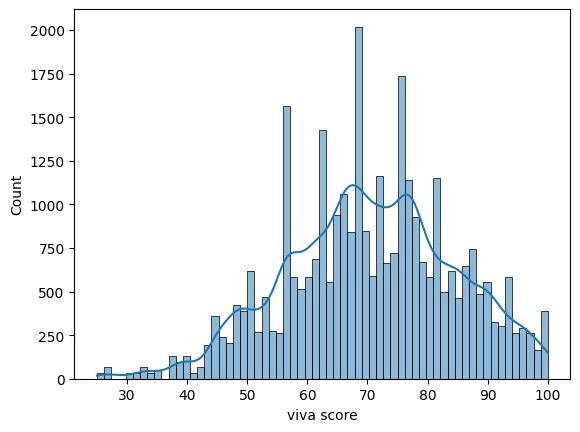

In [29]:
sns.histplot(data,x='viva score',kde=True)

The mean viva score (70.375) is slightly higher than the median viva score (70.0). This suggests that the distribution of viva scores might be slightly right-skewed, meaning there could be some higher scores pulling the mean slightly above the median.


The median viva score is not significantly different from the mean, suggesting the data might be roughly symmetrically distributed.

Text(0.5, 1.0, 'Viva Score')

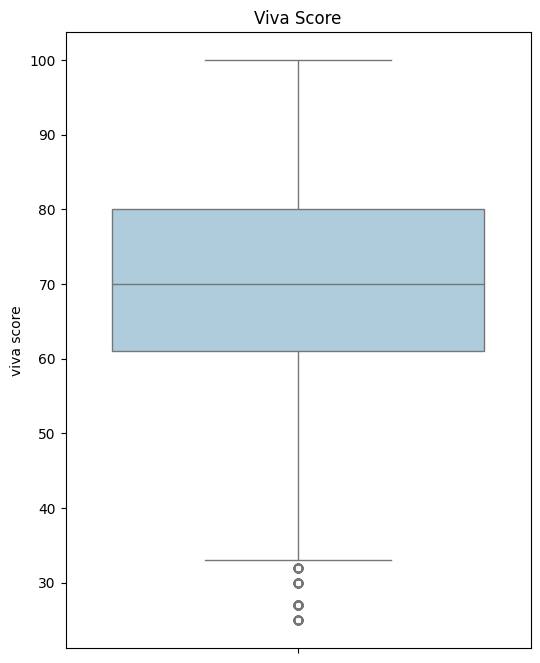

In [97]:
plt.figure(figsize=(6,8))
sns.boxplot(data['viva score'])
plt.title('Viva Score')

In [34]:
lower_fence,upper_fence=calculate_lowupperfence(data['viva score'])
print("Lower Fence : {}\nUpper Fence : {}".format(lower_fence,upper_fence))

Lower Fence : 32.5
Upper Fence : 108.5


The practical scores below Lowerfence (32.5) & above Upperfence (108.5) are consider as Outliers

Analysing Categorical Columns

In [11]:
data.rename({'test preparation ':'test preparation'},axis=1,inplace=True)

In [272]:
data.columns

Index(['Roll no', 'test preparation', 'gender', 'parental level of education',
       'lunch', 'Section', 'practical score', 'viva score', 'exam score'],
      dtype='object')

In [79]:
data['test preparation'].unique()

array(['none', 'completed'], dtype=object)

C:\Users\sures\AppData\Local\Temp\ipykernel_7920\1676416748.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['test preparation'].value_counts().index,y=data['test preparation'].value_counts().values,palette='PuBuGn')


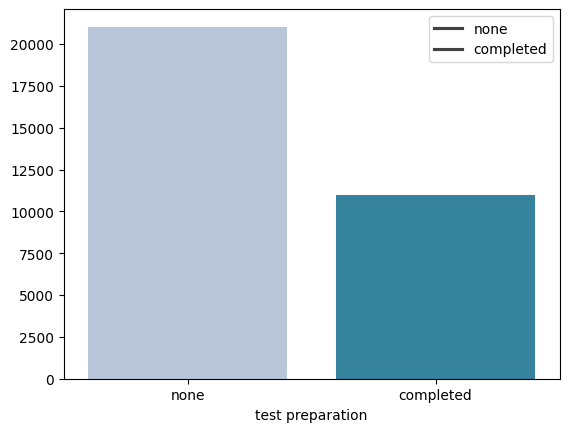

In [114]:
sns.barplot(x=data['test preparation'].value_counts().index,y=data['test preparation'].value_counts().values,palette='PuBuGn')
plt.legend(data['test preparation'].value_counts().index)
plt.show()

In [119]:
data['test preparation'].value_counts()

test preparation
none         21031
completed    10968
Name: count, dtype: int64

21031 Students didn't prepare for test and 10968 are prepared for test

In [146]:
data.groupby(['test preparation'])['exam score'].mean()

test preparation
completed    69.274435
none         69.069279
Name: exam score, dtype: float64

The average exam score for those who completed test preparation is slightly higher (about 0.21 [69.274435−69.069279]) compared to those who did not complete preparation.


Analysing "Gender" Column

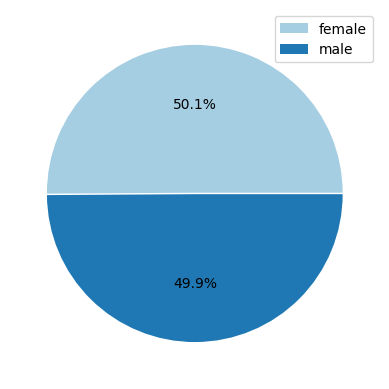

In [136]:
plt.pie(data['gender'].value_counts().values,autopct='%1.1f%%',explode=(0.01,0))
plt.legend(data['gender'].value_counts().index)
plt.show()

In [127]:
data['gender'].value_counts()

gender
female    16031
male      15968
Name: count, dtype: int64

The number of females and males is nearly equal (16031 and 15968), with females slightly outnumbering males.

 The gender distribution is approximately balanced, with females constituting about 50.1% of the population and males about 49.9%.
 

In [139]:
data.groupby(['gender'])['exam score'].mean()

gender
female    69.255692
male      69.023046
Name: exam score, dtype: float64

Average Exam Score of Females: 69.255692 


Average Exam Score of Males: 69.023046

The average exam score for females is slightly higher than for males, with a difference of about 0.23 (69.255 - 69.023)

C:\Users\sures\AppData\Local\Temp\ipykernel_7920\3499291498.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.groupby(['gender'])['exam score'].mean().index,y=data.groupby(['gender'])['exam score'].mean().values,palette='PuBuGn')


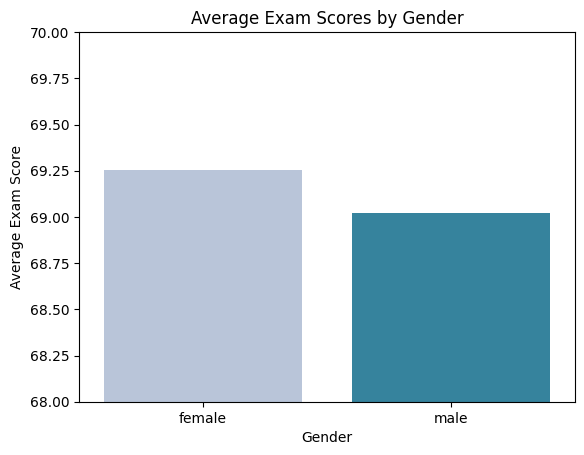

In [206]:
sns.barplot(x=data.groupby(['gender'])['exam score'].mean().index,y=data.groupby(['gender'])['exam score'].mean().values,palette='PuBuGn')
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')
plt.title('Average Exam Scores by Gender')
plt.ylim(68, 70) 
plt.show()


Analysing "parental level of education" column

In [181]:
data['parental level of education'].value_counts()

parental level of education
some college          7083
high school           6836
associate's degree    6556
some high school      5471
bachelor's degree     3341
master's degree       2712
Name: count, dtype: int64

C:\Users\sures\AppData\Local\Temp\ipykernel_7920\2008613902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['parental level of education'].value_counts().index,y=data['parental level of education'].value_counts().values,palette='PuBuGn')


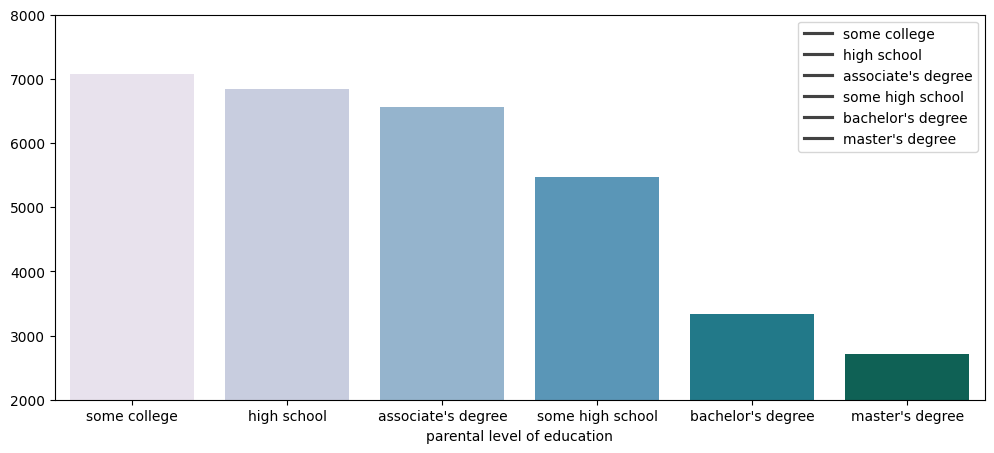

In [189]:
plt.figure(figsize=(12,5))
sns.barplot(x=data['parental level of education'].value_counts().index,y=data['parental level of education'].value_counts().values,palette='PuBuGn')
plt.legend(data['parental level of education'].value_counts().index)
plt.ylim(2000,8000)
plt.show()

"Some College" has the highest number of students (7,083). This might suggest that this level of education is most common among the parents in this dataset.

 "Master's Degree" has the lowest number of students (2,712),it is the least common education level among the parents.

There is a noticeable decrease in the number of students as the level of education increases, suggesting fewer students have parents with higher education levels.

In [190]:
data.groupby(['parental level of education'])['exam score'].mean()

parental level of education
associate's degree    69.383923
bachelor's degree     69.226579
high school           69.205822
master's degree       68.851770
some college          69.150501
some high school      68.839517
Name: exam score, dtype: float64

C:\Users\sures\AppData\Local\Temp\ipykernel_7920\1945774146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.groupby(['parental level of education'])['exam score'].mean().index, y=data.groupby(['parental level of education'])['exam score'].mean().values, palette='viridis')


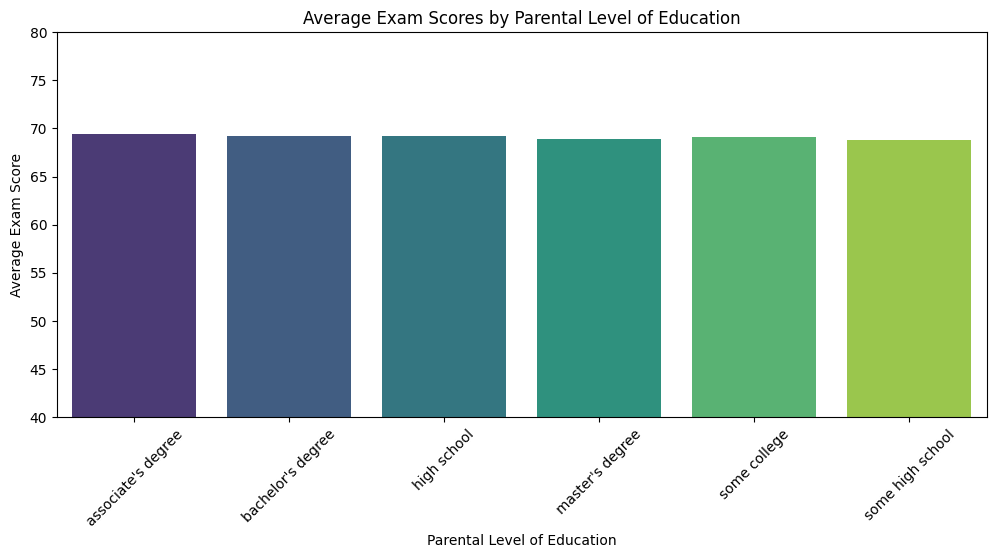

In [194]:

plt.figure(figsize=(12, 5))
sns.barplot(x=data.groupby(['parental level of education'])['exam score'].mean().index, y=data.groupby(['parental level of education'])['exam score'].mean().values, palette='viridis')
plt.xticks(rotation=45) 
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Exam Score')
plt.title('Average Exam Scores by Parental Level of Education')
plt.ylim(40,80)
plt.show()


 "Associate's Degree" has the highest average exam score of 69.38.

"Some High School" has the lowest average exam score of 68.84.

Average Exam scores vary slightly across different education levels, with the highest and lowest average scores differing by approximately 0.54 

Analysis on "Lunch" Column

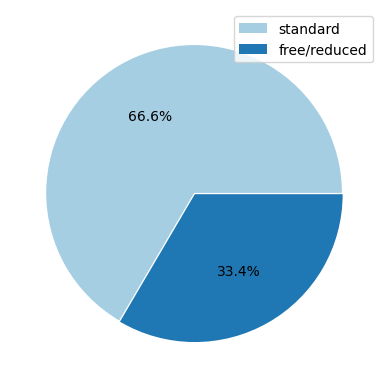

In [198]:
plt.pie(data['lunch'].value_counts().values,autopct='%1.1f%%',explode=(0.01,0))
plt.legend(data['lunch'].value_counts().index)
plt.show()

In [199]:
data['lunch'].value_counts()

lunch
standard        21296
free/reduced    10703
Name: count, dtype: int64

 The majority (66.6%) of students have "standard" lunches, while a significant portion (33.4%) are on "free/reduced" lunches.

In [200]:
data.groupby(['lunch'])['exam score'].mean()

lunch
free/reduced    68.845090
standard        69.287613
Name: exam score, dtype: float64

Average exam score of students who have free/reduced lunch : 68.84

Average exam score of students who have Standard lunch : 69.28

The average exam score of students who have Standard lunch is slightly higher than reduced lunch, with a difference of about 0.44 (68.84 - 69.28)

C:\Users\sures\AppData\Local\Temp\ipykernel_7920\2214249.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.groupby(['lunch'])['exam score'].mean().index,y=data.groupby(['lunch'])['exam score'].mean().values,palette='PuBuGn')


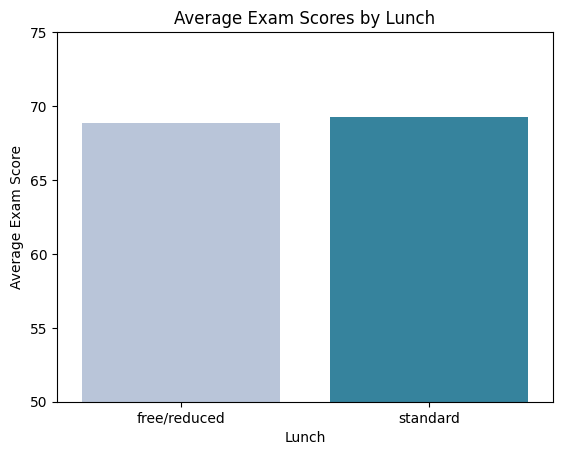

In [205]:
sns.barplot(x=data.groupby(['lunch'])['exam score'].mean().index,y=data.groupby(['lunch'])['exam score'].mean().values,palette='PuBuGn')
plt.xlabel('Lunch')
plt.ylabel('Average Exam Score')
plt.title('Average Exam Scores by Lunch')
plt.ylim(50, 75) 
plt.show()


Analysing Section Column

In [273]:
data['Section'].value_counts()

Section
Section C    10323
Section D     8214
Section B     6408
Section E     4555
Section A     2499
Name: count, dtype: int64

There are 5 sections in total.Section C is the largest, followed by Section D, Section B, Section E, and Section A.

In [217]:
data['Section'].value_counts()

Section
Section C    10323
Section D     8214
Section B     6408
Section E     4555
Section A     2499
Name: count, dtype: int64

C:\Users\sures\AppData\Local\Temp\ipykernel_7920\1018553016.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Section'].value_counts().index,y=data['Section'].value_counts().values,palette='PuBuGn')


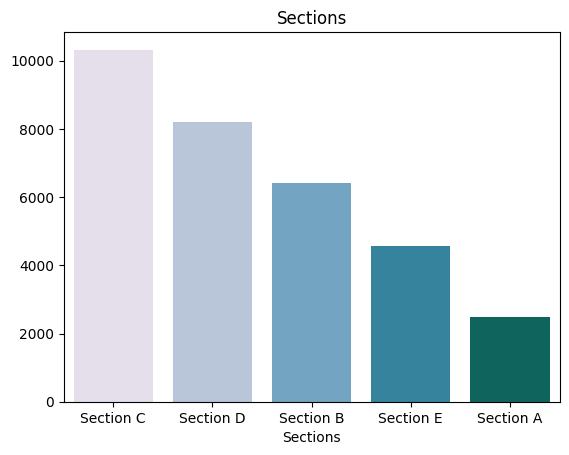

In [223]:
sns.barplot(x=data['Section'].value_counts().index,y=data['Section'].value_counts().values,palette='PuBuGn')
plt.xlabel('Sections')
plt.title('Sections')
plt.show()


C:\Users\sures\AppData\Local\Temp\ipykernel_7920\3894185739.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.groupby(['Section'])['exam score'].mean().index,y=data.groupby(['Section'])['exam score'].mean().values,palette='PuBuGn')


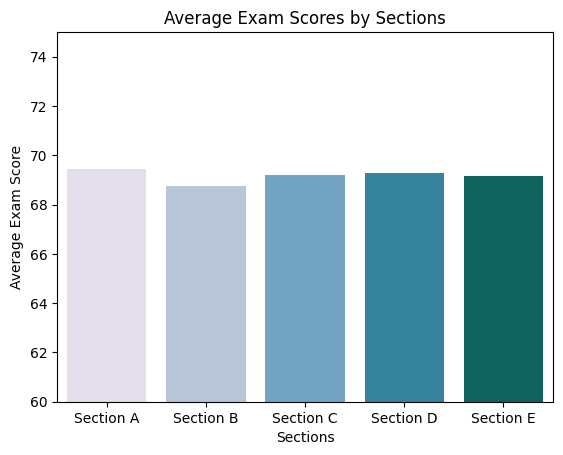

In [215]:
sns.barplot(x=data.groupby(['Section'])['exam score'].mean().index,y=data.groupby(['Section'])['exam score'].mean().values,palette='PuBuGn')
plt.xlabel('Sections')
plt.ylabel('Average Exam Score')
plt.title('Average Exam Scores by Sections')
plt.ylim(60, 75) 
plt.show()


Section A has the highest average score at 69.46, followed closely by Section D at 69.27.

Section B and Section C are also quite close in average scores, with Section C slightly higher than Section B.

Section E has the lowest average score among the sections listed, at 69.15.

These average scores suggest that there is generally consistency in performance across sections, with Section A showing slightly higher performance on average compared to the others.

Data Preprocessing

In [12]:
data['test preparation'].replace({'none':0,'completed':1},inplace=True)

C:\Users\sures\AppData\Local\Temp\ipykernel_27148\231370809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['test preparation'].replace({'none':0,'completed':1},inplace=True)
C:\Users\sures\AppData\Local\Temp\ipykernel_27148\231370809.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data

In [86]:
data['gender']=data['gender'].map({'female':0,'male':1})

In [14]:
data['lunch'].map({'standard':1,'free/reduced':0})

0        1
1        0
2        0
3        0
4        1
        ..
31994    0
31995    1
31996    0
31997    1
31998    1
Name: lunch, Length: 31999, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder=LabelEncoder()
data['Section']=encoder.fit_transform(data['Section'])

In [26]:
data['lunch']=encoder.fit_transform(data['lunch'])

In [78]:
from sklearn.preprocessing import OneHotEncoder

one_en=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
d=one_en.fit_transform(data[['parental level of education']])

In [91]:
data1=data.copy()

In [ ]:
data=pd.concat([data,d],axis=1).drop(columns=['parental level of education'])

In [97]:
data.drop(columns=['Roll no'],inplace=True) 

In [100]:
data.head()      #CleanData

,test preparation,gender,lunch,Section,practical score,viva score,exam score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,0,70,73,70,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,0,2,55,54,52,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1,0,4,56,46,43,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,2,35,47,41,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,1,2,87,92,81,0.0,0.0,1.0,0.0,0.0,0.0


<Axes: >

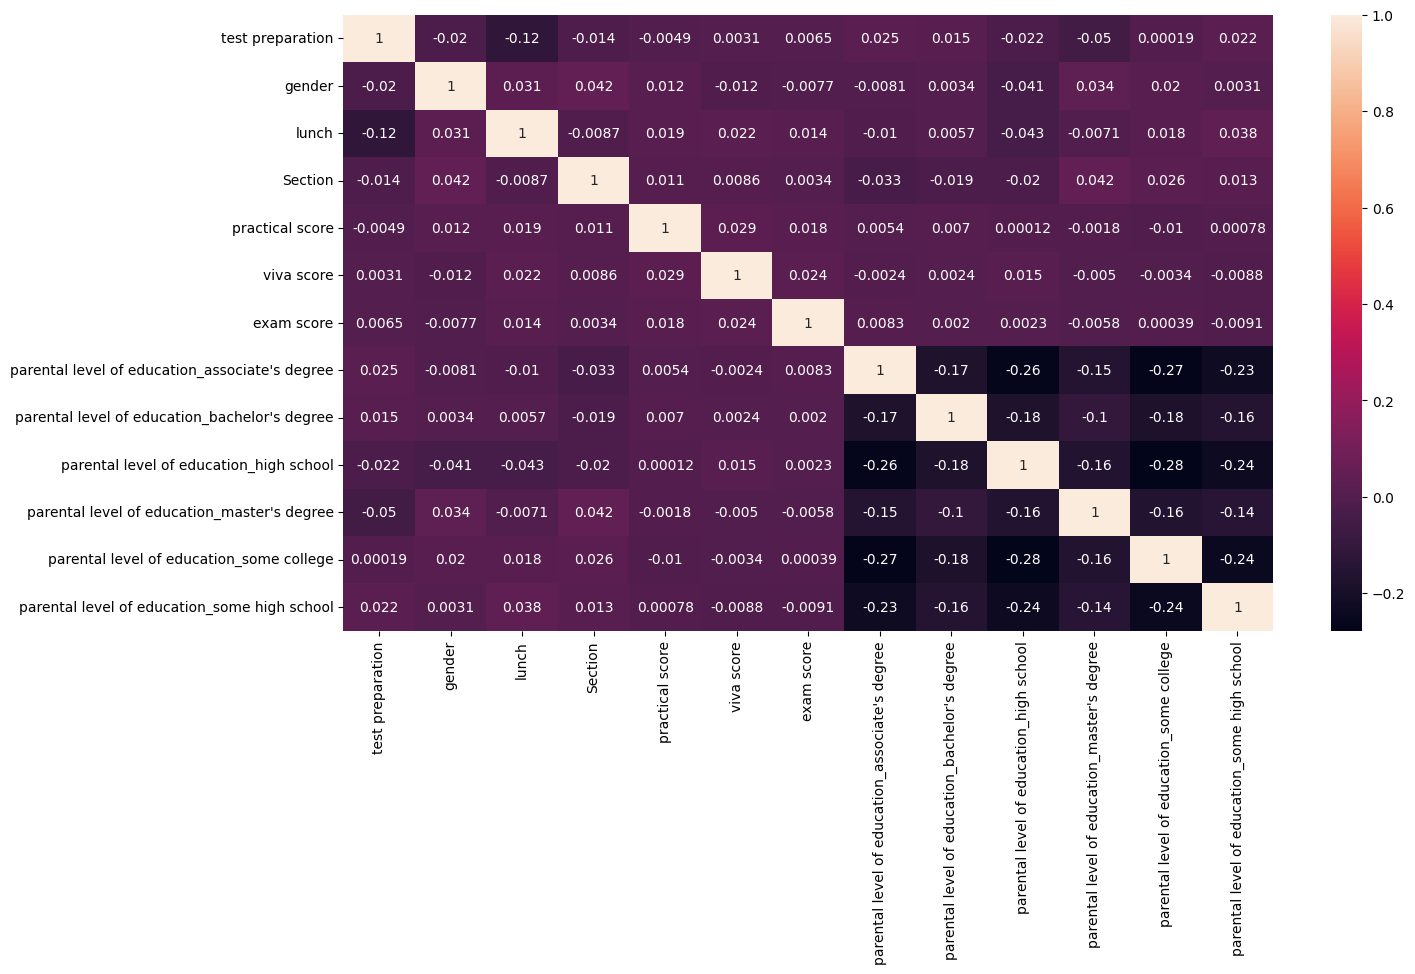

In [107]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [128]:
data.columns

Index(['test preparation', 'gender', 'lunch', 'Section', 'practical score',
       'viva score', 'exam score',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school'],
      dtype='object')

In [130]:
x=data.drop('exam score',axis=1)
y=data['exam score']

Data Normalization

In [136]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=scaler.fit_transform(x)

Model Building

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score


modelclasses=[
    ["K-NearestNeighbors",KNeighborsRegressor(n_neighbors=25)],
    ["DecisionTree",DecisionTreeRegressor()],
    ["RandomForest",RandomForestRegressor()],
    ["Linear Regression",LinearRegression()],
    ["Support Vector",SVR()],
]
mean_absolute=[]
mean_sqr=[]
r2=[]

for modelname,Model in modelclasses:        
        model=Model
        model.fit(x,y)
        ypred=model.predict(x)
        mean_absolute=mean_absolute_error(y,ypred)
        mean_sqr=mean_squared_error(y,ypred)
        r2=r2_score(y,ypred)
        

        print(f"--------------{modelname}----------------\n \n Mean Absolute Error : {mean_absolute}\nMean Squared Error : {mean_sqr}\nR2 Score : {r2}")
      

--------------K-NearestNeighbors----------------
 
 Mean Absolute Error : 11.809345292040376
Mean Squared Error : 215.030363648864
R2 Score : ('K-NearestNeighbors', 0.04554931407342466)
--------------DecisionTree----------------
 
 Mean Absolute Error : 0.71369730304072
Mean Squared Error : 9.517615133806263
R2 Score : ('DecisionTree', 0.9577543648315616)
--------------RandomForest----------------
 
 Mean Absolute Error : 4.754727722303913
Mean Squared Error : 38.76806221526672
R2 Score : ('RandomForest', 0.8279210296373373)
--------------Linear Regression----------------
 
 Mean Absolute Error : 12.109110815509784
Mean Squared Error : 224.9976294532226
R2 Score : ('Linear Regression', 0.0013078240700997723)
--------------Support Vector----------------
 
 Mean Absolute Error : 12.00196125902612
Mean Squared Error : 223.83692728044434
R2 Score : ('Support Vector', 0.0064598080325772855)


from training the data with different models ,we can conclude that

Decision Tree: Performing very well with low MAE and MSE and a high R2 score.

Linear Regression: Performing poorly with high MAE and MSE and a near-zero R2 score.


K-Nearest Neighbors: Performs better than Linear Regression but not as well as the Decision Tree. The KNN model has a lower MAE and MSE compared to Linear Regression but still a relatively low R2 score.

Support Vector: Among the models we evaluated, it has the lowest R2 score and comparable MAE and MSE to Linear Regression and KNN, making it the least effective model.

Random Forest: Performs very well, with lower MAE and MSE than Linear Regression, KNN, and Support Vector models. The R2 score is high but slightly lower than the Decision Tree.

- Finally the Decision Tree still holds the top position in terms of performance metrics.

In [143]:
model=DecisionTreeRegressor()
model.fit(x,y)
model

DecisionTreeRegressor()

In [145]:
pred=model.predict(x)
pred

array([70., 52., 43., ..., 74., 82., 82.])

In [147]:
print('R2 Score :',r2_score(y,pred)*100)

R2 Score : 95.77543648315616


In [148]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

Predicting Exam Score on Test Data

In [200]:
test_data=pd.read_csv('./test.csv')
testdf=test_data.copy()
test_data.head()

,Roll no,test preparation,gender,parental level of education,lunch,Section,practical score,viva score
0,EXA32000,none,male,associate's degree,standard,Section C,74,89
1,EXA32001,completed,male,some high school,standard,Section E,66,75
2,EXA32002,none,male,some high school,standard,Section C,52,55
3,EXA32003,completed,male,some high school,standard,Section D,69,85
4,EXA32004,none,female,bachelor's degree,standard,Section E,46,62


In [151]:
test_data.shape

(100, 8)

Preprocessing Test Data

In [201]:
test_data['test preparation ']=test_data['test preparation '].map({'none':0,'completed':1})
test_data['gender']=test_data['gender'].map({'female':0,'male':1})
test_data['lunch'].map({'standard':1,'free/reduced':0})
test_data['Section']=encoder.fit_transform(test_data['Section'])
test_data['lunch']=encoder.fit_transform(test_data['lunch'])
oneen_data=one_en.fit_transform(test_data[['parental level of education']])
test_data=pd.concat([test_data,oneen_data],axis=1).drop(columns=['parental level of education','Roll no'])

In [202]:
test_data.head()

,test preparation,gender,lunch,Section,practical score,viva score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,2,74,89,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,4,66,75,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,1,2,52,55,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,1,3,69,85,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,4,46,62,0.0,1.0,0.0,0.0,0.0,0.0


In [203]:
test_data=scaler.transform(test_data)
test_data

array([[-0.71774056,  0.88640526,  0.63910148, ..., -0.31448545,
        -0.46852129, -0.531085  ],
       [ 1.39326109,  0.88640526,  0.63910148, ..., -0.31448545,
        -0.46852129,  1.88293774],
       [-0.71774056,  0.88640526,  0.63910148, ..., -0.31448545,
        -0.46852129,  1.88293774],
       ...,
       [-0.71774056,  0.88640526,  0.63910148, ..., -0.31448545,
         2.13437475, -0.531085  ],
       [ 1.39326109,  0.88640526,  0.63910148, ..., -0.31448545,
        -0.46852129, -0.531085  ],
       [-0.71774056,  0.88640526,  0.63910148, ..., -0.31448545,
        -0.46852129, -0.531085  ]])

In [204]:
examscores=model.predict(test_data)
examscores

array([ 68. ,  65.5,  76. ,  81. ,  65. ,  84. ,  73. ,  72. ,  46. ,
        79. ,  56. ,  51. ,  94. ,  89. ,  71. ,  60. ,  40. ,  72. ,
        81. ,  98. ,  63. ,  76. ,  72. ,  94. ,  58.5,  74. ,  59. ,
        74. ,  57. ,  40. ,  43. ,  76. , 100. ,  87. ,  95. ,  56. ,
        30. ,  74. ,  46. ,  52. ,  87. ,  76. ,  73. ,  89. ,  74. ,
        67. ,  61. ,  76. ,  67. ,  44. ,  70. ,  73. ,  74. ,  68. ,
        83. ,  78. ,  87. ,  70. ,  66. ,  46. ,  56. ,  87. , 100. ,
        72. ,  90. ,  68. , 100. ,  51. ,  65. ,  53. ,  64. ,  66. ,
        70. ,  57. ,  66. , 100. ,  75. ,  81. ,  74. ,  83. ,  93. ,
        99. ,  90. ,  62. ,  67. ,  59. ,  89. ,  96. ,  27. ,  55. ,
        68. ,  89. ,  93. ,  64. ,  87. ,  72. ,  59. ,  93. ,  83. ,
        75. ])

In [206]:
result={
    'Roll no':testdf['Roll no'],
    'Exam score':examscores
}


In [207]:
ExamScores=pd.DataFrame(result,index=None)

In [208]:
ExamScores

,Roll no,Exam score
0,EXA32000,68.0
1,EXA32001,65.5
2,EXA32002,76.0
3,EXA32003,81.0
4,EXA32004,65.0
...,...,...
95,EXA32095,72.0
96,EXA32096,59.0
97,EXA32097,93.0
98,EXA32098,83.0


In [209]:
ExamScores.to_csv('Submission.csv')

@SureshKrishnan

- https://www.linkedin.com/in/suresh-krishnan-s/

- https://github.com/SKrishna-7